<a href="https://colab.research.google.com/github/sronast/NN/blob/master/mnist_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
tf.__version__

'2.1.0-rc1'

In [0]:
mnist = tf.keras.datasets.fashion_mnist

In [16]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [17]:
X_train.shape

(60000, 28, 28)

In [0]:
X_train , X_test = X_train/255.0, X_test/255.0

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

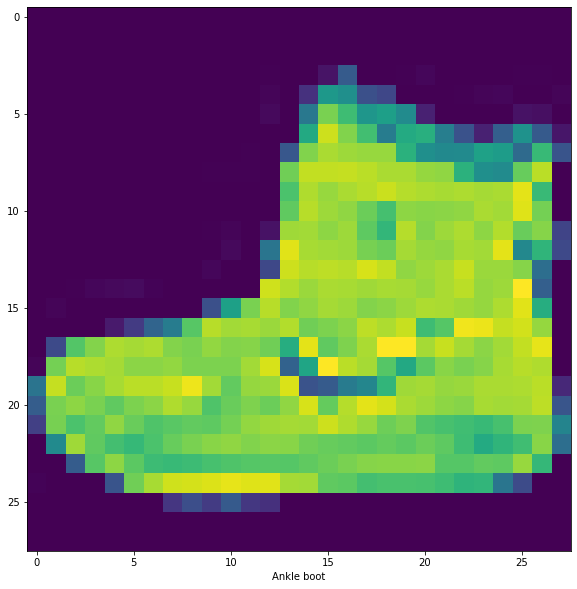

In [21]:
plt.figure(figsize =(10,10))
plt.imshow(X_train[0])
plt.xlabel(class_names[y_train[0]])
plt.show()

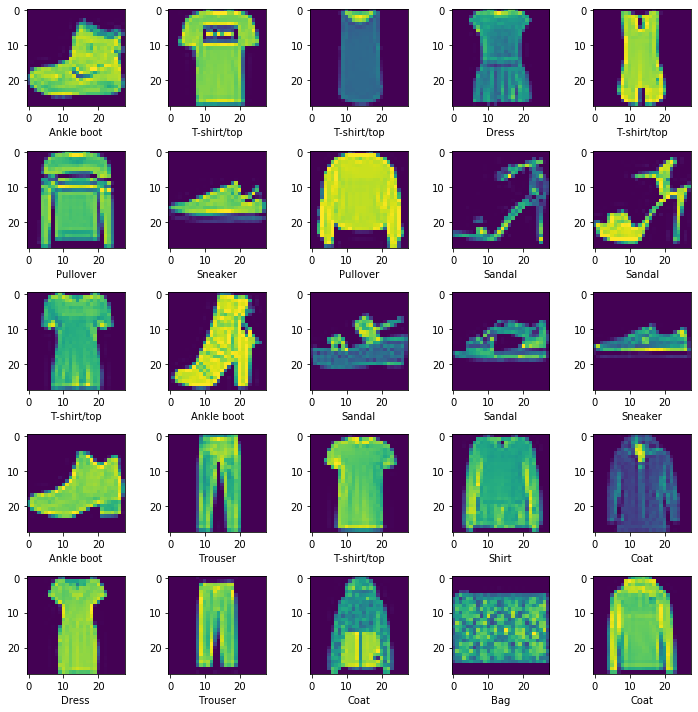

In [27]:
plt.figure(figsize = (10,10))

for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(X_train[i])
  plt.xlabel(class_names[y_train[i]])
plt.tight_layout()
plt.show()

## Setting up the model

In [0]:
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape = (28,28)),
                             tf.keras.layers.Dense(128, activation= 'relu'),
                             tf.keras.layers.Dense(10, activation='softmax')
])

In [0]:
model.compile(optimizer= 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [52]:
model.fit(X_train, y_train, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.3665 - accuracy: 0.8676
Epoch 2/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.3300 - accuracy: 0.8805
Epoch 3/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.3092 - accuracy: 0.8883
Epoch 4/10
60000/60000 [==============================] - 4s 75us/sample - loss: 0.2920 - accuracy: 0.8929
Epoch 5/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.2787 - accuracy: 0.8972
Epoch 6/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.2668 - accuracy: 0.9014
Epoch 7/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.2570 - accuracy: 0.9045
Epoch 8/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.2460 - accuracy: 0.9083
Epoch 9/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.2373 - accuracy: 0.9115
Epoch 10/10
60

In [0]:
predictions = model.predict(X_test)

In [54]:
predictions.shape

(10000, 10)

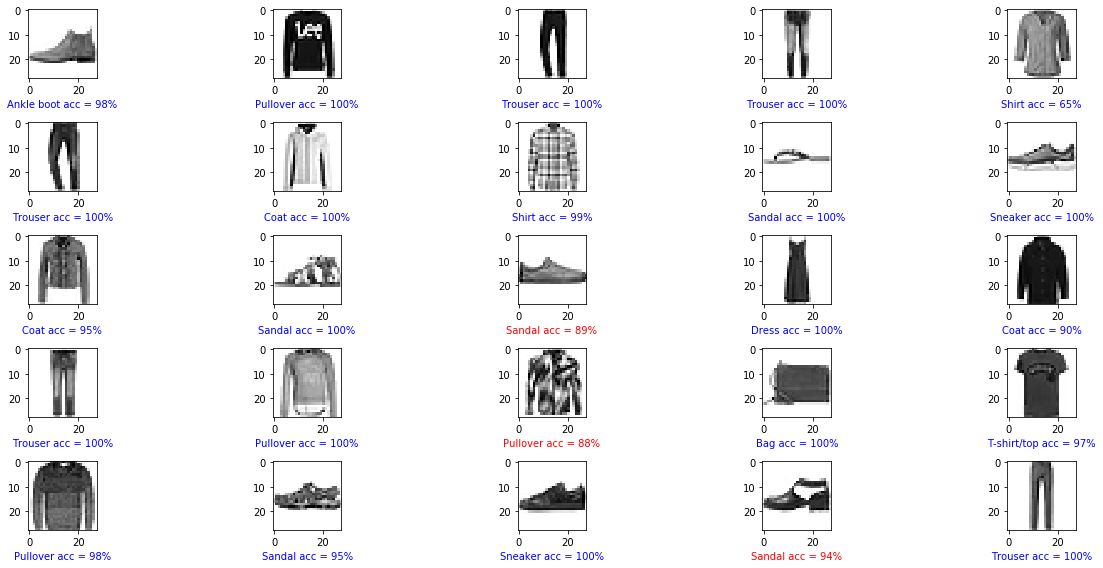

In [55]:
plt.figure(figsize = (18,8))

for i in range(25):
  plt.subplot(5,5,i+1)
  if y_test[i] == np.argmax(predictions[i]):
    Xlabel_color = 'blue'
  else:
    Xlabel_color = 'red'
  plt.imshow(X_test[i], cmap = plt.cm.binary)
  plt.xlabel('{} acc = {:2.0f}%'.format(class_names[np.argmax(predictions[i])], 100*np.max(predictions[i])) ,color = Xlabel_color)

plt.tight_layout()
plt.show()

In [56]:
class_names[y_test[12]]

'Sneaker'

In [0]:
img = X_test[100]

In [59]:
img.shape

(28, 28)

In [0]:
img = np.expand_dims(img, 0)

In [63]:
model.predict(img)

array([[1.2942634e-02, 2.6337432e-06, 2.1760845e-06, 9.8588562e-01,
        3.9748866e-05, 2.4869622e-09, 1.1234621e-03, 4.0784327e-11,
        3.7511941e-06, 5.1920312e-09]], dtype=float32)

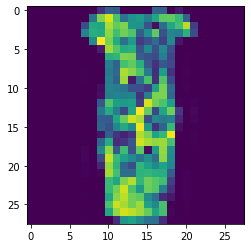

In [65]:
plt.imshow(X_test[100])